# Capstone Project - The Battle of Neighborhoods

## Contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Conclusion](#conclusion)



## Introduction <a name="introduction"></a>

**Bangalore** is one of the largest and beautiful cities in India. The **malls** in Bangalore are great hangout spots for people. They are go-to places for people who want to shop, eat, watch movies, etc. There are a number of malls in Bangalore, each with its own attractions.

In this project we will try to find out the places with the **best rated malls and most liked malls** and also find the **neighborhoods with more malls**. We also find the same for zones.

## Data <a name="data"></a>

For this project, the data required is as follows:
* Data of Bangalore city that has the lists the zone of a neighborhood along with its latitude and longitude
* The malls at each neighborhoods of the city with its id
* Ratings and likes given by actual users to a particular mall

## Methodology <a name="methodology"></a>

* [1. Obtaining and visualising the neighborhood data](#step1)
* [2. Obtaining and visualising the details of the malls in each neighborhood](#step2)
* [3. Obtaining other details of the malls](#step3)
* [4. Interpreting the data obtained](#step4)

### Step 1 <a name="step1"></a>

We start by importing the necessary libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

All the necessary libraries are imported

Now, we import the data from the csv file **TLoc_Data.csv**. It is a csv file I have made, part manually, by collecting the data from wikipedia and quora.

In [3]:
df = pd.read_csv('TLoc_Data.csv')
df.head()

,Zone,Neighborhood,Latitude,Longitude
0,Central,Ashoknagar,13.053080,77.497860
1,Central,Austin Town,12.963480,77.612970
2,Central,Avenue Road,12.968451,77.578960
3,Central,Balepet,12.971215,77.573977
4,Central,Benson Town,13.001420,77.601930


The latitude and longitude values of Bangalore city are obtained using geopy library.

In [4]:
address = 'Bangalore, India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('{}, {}.'.format(latitude, longitude))

12.9791198, 77.5912997.


Lets visualise the number of neighborhoods in each zone

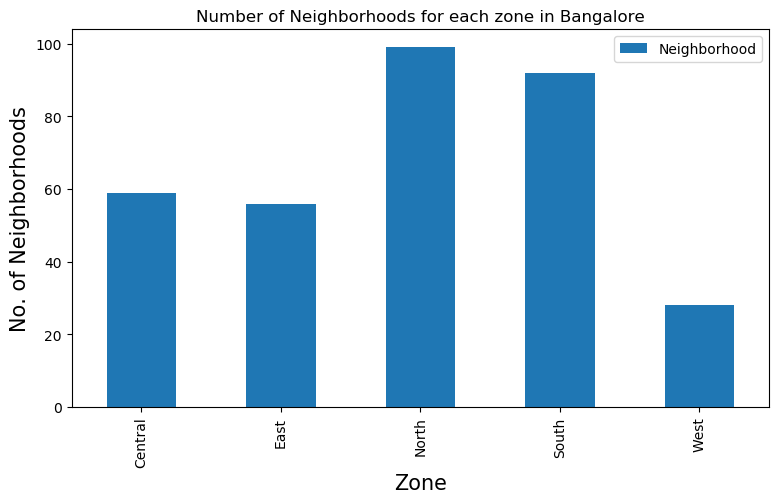

In [153]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Number of Neighborhoods for each zone in Bangalore')
plt.xlabel('Zone')
plt.ylabel('No. of Neighborhoods')
df.groupby('Zone')['Neighborhood'].count().plot(kind='bar')
plt.legend()
plt.show()

As we can see from the above graph North zone has the highest number of neighborhoods

Now a map of Bangalore with its neighborhoods superimposed on top is made using folium library.

In [5]:
bmap = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(bmap)  
    
bmap

### Step 2 <a name="step2"></a>

Your client id and client secret, which can be obtained from the foursquare developers page are entered along with the foursquare api version.

In [12]:
CLIENT_ID = '#########'
CLIENT_SECRET = '#########'
VERSION = '20200501'

A function to get all the details of all the malls within a radius of 1000m from a particular neighborhood, using foursquare api is defined.

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            search_query,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,  
            v['venue']['id'],
            v['venue']['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Venue ID',
                  'Venue']
    
    return(nearby_venues)

The details of the malls are obtained, using the function declared above, in the following cell. 

In [15]:
LIMIT=100
search_query = "Mall"
bvenues = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'])

Ashoknagar
Austin Town
Avenue Road
Balepet
Benson Town
Bharathnagar
Brigade Road
Brunton Road
Central Street
Chakravarthy Lane
Chickpet
Chord Road
Church Street
Commercial Street
Cooke Town
Cox Town
Crescent Road
Cubbonpet
Cunningham
Gayatri Nagar
Harogadde
Hennagara
High Grounds
Hulimangala
Indalavadi
K. P. West
Lalbagh West
Langford Town
Madhava Nagar
Mahatma Gandhi road
Mamulpet
Manjunatha Nagar
Marsur
Mavalli
MG Railway Colony
Minerva Circle
Murphy Town
Nagarathpet
Narayan Pillai Street
Okalipuram
Prakash Nagar
Ramachandrapura
Richmond Town
S.R. Nagar
Samandur
Sampangiram Nagar
Shankarapuram
Shanthinagar
Shivajinagar
Sidihoskote
Srirampuram
Tannery Road
Thammanayakanahalli
Ulsoor
Vanakanahalli
Vasanth Nagar
Victoria Layout
Visveswarapuram
Vittalnagar
Agrahara
Airport Road
Akshaya Nagar
Ali Asker Road
Amruthahalli
Baiyappanahalli
Bangalore Air port
Basavanagar
Bellandur
Brookefield
Carmelaram
CV Raman Nagar
Devanagundi
Devasandra
Doddanakundi
Domlur
Dooravani Nagar
Fraser Town
GR Te

In [16]:
print(bvenues.shape)
bvenues.head()

(348, 3)


,Neighborhood,Venue ID,Venue
0,Austin Town,4b9799c1f964a520f40a35e3,Lifestyle
1,Austin Town,4b4ac168f964a520f58d26e3,Shoppers Stop
2,Austin Town,4ba1f6c1f964a520e4d337e3,Garuda Mall
3,Austin Town,4c36c03218e72d7f686d15f5,Westside
4,Austin Town,4bd199889854d13a57c7f94d,Food Court


Merge the two dataframes to add the zone column

In [18]:
bvenues1 = df.merge(bvenues)

In [19]:
bvenues1.shape
bvenues1.head()

,Zone,Neighborhood,Latitude,Longitude,Venue ID,Venue
0,Central,Austin Town,12.96348,77.61297,4b9799c1f964a520f40a35e3,Lifestyle
1,Central,Austin Town,12.96348,77.61297,4b4ac168f964a520f58d26e3,Shoppers Stop
2,Central,Austin Town,12.96348,77.61297,4ba1f6c1f964a520e4d337e3,Garuda Mall
3,Central,Austin Town,12.96348,77.61297,4c36c03218e72d7f686d15f5,Westside
4,Central,Austin Town,12.96348,77.61297,4bd199889854d13a57c7f94d,Food Court


In [22]:
bvenues1.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
bvenues1.head()

,Zone,Neighborhood,Venue ID,Venue
0,Central,Austin Town,4b9799c1f964a520f40a35e3,Lifestyle
1,Central,Austin Town,4b4ac168f964a520f58d26e3,Shoppers Stop
2,Central,Austin Town,4ba1f6c1f964a520e4d337e3,Garuda Mall
3,Central,Austin Town,4c36c03218e72d7f686d15f5,Westside
4,Central,Austin Town,4bd199889854d13a57c7f94d,Food Court


In [23]:
bvenues1.to_csv('BMalls_Data.csv', index=False)

Lets visualise the number of malls in each zone.

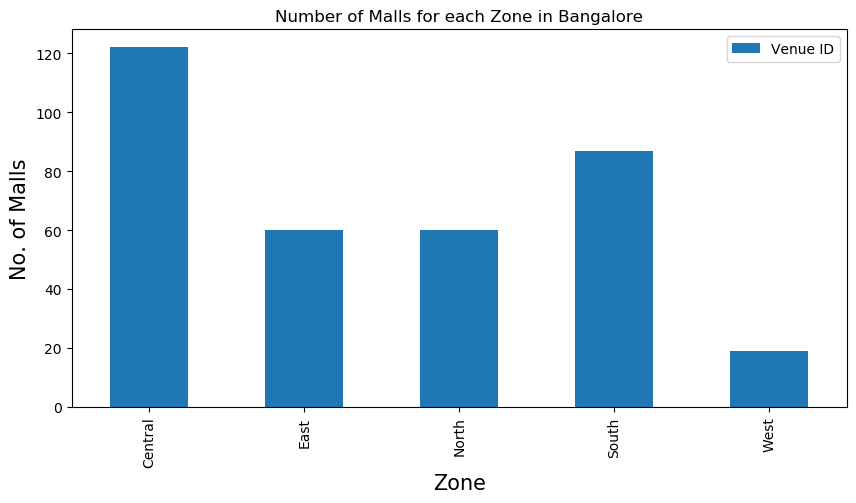

In [24]:
plt.figure(figsize=(10,5), dpi = 100)
plt.title('Number of Malls for each Zone in Bangalore')
plt.xlabel('Zone')
plt.ylabel('No. of Malls')
bvenues1.groupby('Zone')['Venue ID'].count().plot(kind='bar')
plt.legend()
plt.show()

From the bar graph above we can conclude that the Central zone has most number of malls whereas North zone, which has the highest number of neighborhoods, has a lesser number of malls.

Now lets visualise the neighborhoods with highest number of malls.

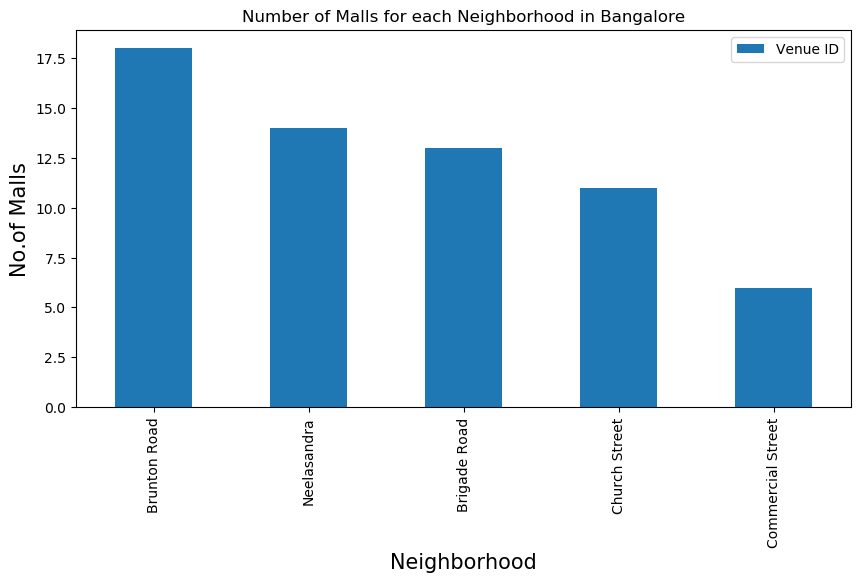

In [25]:
plt.figure(figsize=(10,5), dpi = 100)
plt.title('Number of Malls for each Neighborhood in Bangalore')
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No.of Malls', fontsize=15)
bvenues1.groupby('Neighborhood')['Venue ID'].count().nlargest(5).plot(kind='bar')
plt.legend()
plt.show()

As we can see in the above bar graph, Brunton road has highest number of malls.

The list of malls in Brunton road is found below.

In [30]:
bvenues1[bvenues1['Neighborhood']=='Brunton Road']

,Zone,Neighborhood,Venue ID,Venue
27,Central,Brunton Road,4b9799c1f964a520f40a35e3,Lifestyle
28,Central,Brunton Road,4fabd03ae4b050ddfe0aa376,Foodhall
29,Central,Brunton Road,4f884376e4b002b90a20c1b3,1 MG Road
30,Central,Brunton Road,4b666b2df964a520d4202be3,M G Road
31,Central,Brunton Road,4b4ac168f964a520f58d26e3,Shoppers Stop
32,Central,Brunton Road,4be168bcd816c92850f2efd9,Indo Dubai Plaza
33,Central,Brunton Road,4ba1f6c1f964a520e4d337e3,Garuda Mall
34,Central,Brunton Road,4c0508eaf423a593345ad216,Bangalore Central
35,Central,Brunton Road,4c2c4fc9721695217e4d7f8f,Public Utility Building
36,Central,Brunton Road,4c36c03218e72d7f686d15f5,Westside


### Step 3 <a name="step3"></a>

We are now declaring a function to find the other details of the mall such as its likes, rating, etc using the foursquare api.

In [41]:
def getvenuedetails(venue_id):
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CID, 
            CS, 
            VERSION)
    
    # get all the data
    vds_list=[]
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        vds_list.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    vds_df = pd.DataFrame(vds_list,columns=column_names)
    return vds_df

Dividing the data into seven parts.

In [32]:
d1 = bvenues1.head(50)
d2 = bvenues1.iloc[51:101]
d3 = bvenues1.iloc[101:151]
d4 = bvenues1.iloc[151:201]
d5 = bvenues1.iloc[201:251]
d6 = bvenues1.iloc[251:301]
d7 = bvenues1.iloc[301:]

Getting the details for d1.

In [33]:
column_names=['Zone', 'Neighborhood', 'Venue ID','Venue','Likes','Rating','Tips']
d1_df=pd.DataFrame(columns=column_names)
for row in d1.values.tolist():
    Zone,Neighborhood,Venue_ID,Venue=row
    try:
        venue_details=getvenuedetails(Venue_ID)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',Venue_ID)
        id,name,likes,rating,tips=[0]*5
    d1_df = d1_df.append({'Zone': Zone,
                          'Neighborhood': Neighborhood, 
                          'Venue ID': id,
                          'Venue' : name,
                          'Likes' : likes,
                          'Rating' : rating,
                          'Tips' : tips
                          }, ignore_index=True)

No data available for id= 4e5a1885d22dfba6f47cc424
No data available for id= 4ec8b6724690116a8d9ce136
No data available for id= 52e73d6011d243f49e04acd0
No data available for id= 4e5a1885d22dfba6f47cc424
No data available for id= 4ec8b6724690116a8d9ce136
No data available for id= 52e73d6011d243f49e04acd0
No data available for id= 4f890c91e4b005979de832f1
No data available for id= 4ba87f69f964a52069dd39e3
No data available for id= 4c4192e55faf76b07e724820
No data available for id= 4c2c4fc9721695217e4d7f8f
No data available for id= 4c2c4fc9721695217e4d7f8f
No data available for id= 4c63ff98eb82d13aff2909d6
No data available for id= 4c4192e55faf76b07e724820
No data available for id= 54fc5ee7498e6880b6b8c67d
No data available for id= 4e5a1885d22dfba6f47cc424
No data available for id= 4ec8b6724690116a8d9ce136


Getting the details for d2.

In [37]:
column_names=['Zone', 'Neighborhood', 'Venue ID','Venue','Likes','Rating','Tips']
d2_df=pd.DataFrame(columns=column_names)
for row in d2.values.tolist():
    Zone,Neighborhood,Venue_ID,Venue=row
    try:
        venue_details=getvenuedetails(Venue_ID)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',Venue_ID)
        id,name,likes,rating,tips=[0]*5
    d2_df = d2_df.append({'Zone': Zone,
                          'Neighborhood': Neighborhood, 
                          'Venue ID': id,
                          'Venue' : name,
                          'Likes' : likes,
                          'Rating' : rating,
                          'Tips' : tips
                          }, ignore_index=True)

No data available for id= 511ca7cae4b07dfbcd00ea94
No data available for id= 4c4192e55faf76b07e724820
No data available for id= 4ba87f69f964a52069dd39e3
No data available for id= 4c2c4fc9721695217e4d7f8f
No data available for id= 4c2c4fc9721695217e4d7f8f
No data available for id= 4e5a1885d22dfba6f47cc424
No data available for id= 52c692f9498eaef0d924abc0
No data available for id= 5bd09c03dee770002c7fb43c
No data available for id= 4e2ec8166284021061eb11c1
No data available for id= 4f787102e4b08f9be6814425
No data available for id= 55d9b57f498ed9c37e75c965
No data available for id= 4cf0b5497e93f04d3ee44869
No data available for id= 4e5a1885d22dfba6f47cc424
No data available for id= 4ec8b6724690116a8d9ce136
No data available for id= 52e73d6011d243f49e04acd0
No data available for id= 4fc0981ee4b0a6eab94171f2
No data available for id= 4cf0b5497e93f04d3ee44869
No data available for id= 590cea731bc704026f52f3a1
No data available for id= 4cf0b5497e93f04d3ee44869
No data available for id= 4ba87

Getting the details for d3.

In [39]:
column_names=['Zone', 'Neighborhood', 'Venue ID','Venue','Likes','Rating','Tips']
d3_df=pd.DataFrame(columns=column_names)
for row in d3.values.tolist():
    Zone,Neighborhood,Venue_ID,Venue=row
    try:
        venue_details=getvenuedetails(Venue_ID)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',Venue_ID)
        id,name,likes,rating,tips=[0]*5
    d3_df = d3_df.append({'Zone': Zone,
                          'Neighborhood': Neighborhood, 
                          'Venue ID': id,
                          'Venue' : name,
                          'Likes' : likes,
                          'Rating' : rating,
                          'Tips' : tips
                          }, ignore_index=True)

No data available for id= 5757e5dd498eca4aa7e706b8
No data available for id= 55d9b57f498ed9c37e75c965
No data available for id= 4ca7344544a8224bf28b0a40
No data available for id= 54fc5ee7498e6880b6b8c67d
No data available for id= 4e2ec8166284021061eb11c1
No data available for id= 4e2ec8166284021061eb11c1
No data available for id= 52c692f9498eaef0d924abc0
No data available for id= 5bd09c03dee770002c7fb43c
No data available for id= 5799eec3498e359e3ff9d997
No data available for id= 51c562ae498e967b03059a6d
No data available for id= 5b0d4ed7e1f228002c3129f8
No data available for id= 4ea3c52193ad755e378751aa
No data available for id= 4bc33c91b492d13a8a6ca860
No data available for id= 5199a3c7498e035ebd2fa73a
No data available for id= 4f8ce2efe4b0fec58a463c6a
No data available for id= 4ea3c52193ad755e378751aa
No data available for id= 4c00e2c4ceabb713aff08752
No data available for id= 4bf951a1b182c9b6d6b1785a
No data available for id= 5d3339923715bc0008f24fc0


Getting the details for d4.

In [42]:
column_names=['Zone', 'Neighborhood', 'Venue ID','Venue','Likes','Rating','Tips']
d4_df=pd.DataFrame(columns=column_names)
for row in d4.values.tolist():
    Zone,Neighborhood,Venue_ID,Venue=row
    try:
        venue_details=getvenuedetails(Venue_ID)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',Venue_ID)
        id,name,likes,rating,tips=[0]*5
    d4_df = d4_df.append({'Zone': Zone,
                          'Neighborhood': Neighborhood, 
                          'Venue ID': id,
                          'Venue' : name,
                          'Likes' : likes,
                          'Rating' : rating,
                          'Tips' : tips
                          }, ignore_index=True)

No data available for id= 590cea731bc704026f52f3a1
No data available for id= 5757e5dd498eca4aa7e706b8
No data available for id= 58e4a6d1c30f7927d9737fd1
No data available for id= 550cd869498e50a8c8f710d9
No data available for id= 5da9d2b0ad414e000755ae0b
No data available for id= 5a2cd512947c051bc392955a
No data available for id= 50a11499e4b094dc65049c22
No data available for id= 530b6b5211d2be17bf188871
No data available for id= 51dadbf5498e43767e23b0ac
No data available for id= 4f524396e4b07c31b3287a05
No data available for id= 50d6dcc9e4b025aeeffa07b3
No data available for id= 4ea3c52193ad755e378751aa
No data available for id= 5da9d2b0ad414e000755ae0b
No data available for id= 550cd869498e50a8c8f710d9
No data available for id= 4bc33c91b492d13a8a6ca860
No data available for id= 4bf69ac44d5f20a1549199fe
No data available for id= 4f9bbf78e4b02aa9bf9aa84b
No data available for id= 4ffffd5fe4b053d346ead9a8
No data available for id= 578f1353498e25bd521a6e85
No data available for id= 51111

Getting the details for d5.

In [45]:
column_names=['Zone', 'Neighborhood', 'Venue ID','Venue','Likes','Rating','Tips']
d5_df=pd.DataFrame(columns=column_names)
for row in d5.values.tolist():
    Zone,Neighborhood,Venue_ID,Venue=row
    try:
        venue_details=getvenuedetails(Venue_ID)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',Venue_ID)
        id,name,likes,rating,tips=[0]*5
    d5_df = d5_df.append({'Zone': Zone,
                          'Neighborhood': Neighborhood, 
                          'Venue ID': id,
                          'Venue' : name,
                          'Likes' : likes,
                          'Rating' : rating,
                          'Tips' : tips
                          }, ignore_index=True)

No data available for id= 51f0169d498ee8b1e695c663
No data available for id= 4c9ee2f67ada199c20579cbc
No data available for id= 4ea3c52193ad755e378751aa
No data available for id= 578f1353498e25bd521a6e85
No data available for id= 5145c2dde4b068968c75dd4d
No data available for id= 511112a4e4b0c569fae487dc
No data available for id= 590cea731bc704026f52f3a1
No data available for id= 5757e5dd498eca4aa7e706b8
No data available for id= 5b90cff9911fc4002caf499a
No data available for id= 54fc5ee7498e6880b6b8c67d
No data available for id= 4cf0b5497e93f04d3ee44869
No data available for id= 52e73d6011d243f49e04acd0
No data available for id= 4ec8b6724690116a8d9ce136
No data available for id= 4e5a1885d22dfba6f47cc424
No data available for id= 5145c2dde4b068968c75dd4d
No data available for id= 54fc5ee7498e6880b6b8c67d
No data available for id= 590cea731bc704026f52f3a1
No data available for id= 4ca7344544a8224bf28b0a40
No data available for id= 4fc0981ee4b0a6eab94171f2
No data available for id= 587ac

Getting the details for d6.

In [47]:
column_names=['Zone', 'Neighborhood', 'Venue ID','Venue','Likes','Rating','Tips']
d6_df=pd.DataFrame(columns=column_names)
for row in d6.values.tolist():
    Zone,Neighborhood,Venue_ID,Venue=row
    try:
        venue_details=getvenuedetails(Venue_ID)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',Venue_ID)
        id,name,likes,rating,tips=[0]*5
    d6_df = d6_df.append({'Zone': Zone,
                          'Neighborhood': Neighborhood, 
                          'Venue ID': id,
                          'Venue' : name,
                          'Likes' : likes,
                          'Rating' : rating,
                          'Tips' : tips
                          }, ignore_index=True)

No data available for id= 52ce9fbb498efe8ee9b0a01a
No data available for id= 59e7591825fb7b6e6e354359
No data available for id= 4cb5bbb855af224b2c88947e
No data available for id= 56433726498ecda58ffa9e24
No data available for id= 53b169aa498e0929747d6875
No data available for id= 56d58e12498eebbf26691cd0
No data available for id= 50758910e4b07ef70eb83751
No data available for id= 51f0169d498ee8b1e695c663
No data available for id= 56433726498ecda58ffa9e24
No data available for id= 53b169aa498e0929747d6875
No data available for id= 530b6b5211d2be17bf188871
No data available for id= 590cea731bc704026f52f3a1
No data available for id= 4c2c4fc9721695217e4d7f8f
No data available for id= 530b6b5211d2be17bf188871
No data available for id= 50a11499e4b094dc65049c22
No data available for id= 5cfd190e79f6c7002ccdaade
No data available for id= 5cd7c32f911fc4002c50dd64
No data available for id= 4b966bb0f964a5204acb34e3
No data available for id= 4c4192e55faf76b07e724820
No data available for id= 4ba87

Getting the details for d7.

In [49]:
column_names=['Zone', 'Neighborhood', 'Venue ID','Venue','Likes','Rating','Tips']
d7_df=pd.DataFrame(columns=column_names)
for row in d7.values.tolist():
    Zone,Neighborhood,Venue_ID,Venue=row
    try:
        venue_details=getvenuedetails(Venue_ID)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',Venue_ID)
        id,name,likes,rating,tips=[0]*5
    d7_df = d7_df.append({'Zone': Zone,
                          'Neighborhood': Neighborhood, 
                          'Venue ID': id,
                          'Venue' : name,
                          'Likes' : likes,
                          'Rating' : rating,
                          'Tips' : tips
                          }, ignore_index=True)

No data available for id= 4f9d2265e4b0a3d1dcd3624e
No data available for id= 503f6bdde4b023d1ec282aeb
No data available for id= 4f76e928e4b0488e2e608762
No data available for id= 590cea731bc704026f52f3a1
No data available for id= 5757e5dd498eca4aa7e706b8
No data available for id= 55d9b57f498ed9c37e75c965
No data available for id= 4ca7344544a8224bf28b0a40
No data available for id= 53b169aa498e0929747d6875
No data available for id= 56433726498ecda58ffa9e24
No data available for id= 4bc33c91b492d13a8a6ca860
No data available for id= 5002d433e4b000090f9da54d
No data available for id= 590cea731bc704026f52f3a1
No data available for id= 515fffa2e4b04a48bc8e1607
No data available for id= 59e7591825fb7b6e6e354359
No data available for id= 55d9b57f498ed9c37e75c965
No data available for id= 4ca7344544a8224bf28b0a40
No data available for id= 515fffa2e4b04a48bc8e1607
No data available for id= 4e758b3552b1c8e5198209e0
No data available for id= 5959189135d3fc2a969eb159
No data available for id= 5d9dd

Concatenate all the seven dataframes into a single dataframe.

In [51]:
d_f = pd.concat([d1_df, d2_df, d3_df, d4_df, d5_df, d6_df, d7_df], ignore_index=True)
d_f.shape

(347, 7)

In [52]:
d_f.head()

,Zone,Neighborhood,Venue ID,Venue,Likes,Rating,Tips
0,Central,Austin Town,4b9799c1f964a520f40a35e3,Lifestyle,76,7.4,10
1,Central,Austin Town,4b4ac168f964a520f58d26e3,Shoppers Stop,31,6.2,8
2,Central,Austin Town,4ba1f6c1f964a520e4d337e3,Garuda Mall,296,5.4,108
3,Central,Austin Town,4c36c03218e72d7f686d15f5,Westside,18,6.5,8
4,Central,Austin Town,4bd199889854d13a57c7f94d,Food Court,8,5.5,2


Remove all the zero valued rows from the dataframe

In [53]:
d_f = d_f[(d_f!=0).all(1)]
d_f

,Zone,Neighborhood,Venue ID,Venue,Likes,Rating,Tips
0,Central,Austin Town,4b9799c1f964a520f40a35e3,Lifestyle,76,7.4,10
1,Central,Austin Town,4b4ac168f964a520f58d26e3,Shoppers Stop,31,6.2,8
2,Central,Austin Town,4ba1f6c1f964a520e4d337e3,Garuda Mall,296,5.4,108
3,Central,Austin Town,4c36c03218e72d7f686d15f5,Westside,18,6.5,8
4,Central,Austin Town,4bd199889854d13a57c7f94d,Food Court,8,5.5,2
5,Central,Avenue Road,4c25dc23f1272d7fa97f85c5,National Market,49,5.8,10
9,Central,Balepet,4c25dc23f1272d7fa97f85c5,National Market,49,5.8,10
14,Central,Brigade Road,4b9799c1f964a520f40a35e3,Lifestyle,76,7.4,10
15,Central,Brigade Road,4b4ac168f964a520f58d26e3,Shoppers Stop,31,6.2,8
16,Central,Brigade Road,4be168bcd816c92850f2efd9,Indo Dubai Plaza,3,6.3,8


In [54]:
d_f.shape

(174, 7)

In [56]:
d_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 340
Data columns (total 7 columns):
Zone            174 non-null object
Neighborhood    174 non-null object
Venue ID        174 non-null object
Venue           174 non-null object
Likes           174 non-null object
Rating          174 non-null object
Tips            174 non-null object
dtypes: object(7)
memory usage: 10.9+ KB


Change the data types for Likes, Tips and Rating.

In [57]:
d_f['Likes'] = d_f['Likes'].astype('int64')
d_f['Rating'] = d_f['Rating'].astype('float64')
d_f['Tips'] = d_f['Tips'].astype('int64')

Obtain the details of the malls with highest likes.

In [99]:
print(d_f[d_f.Likes == d_f.Likes.max()])

     Zone  Neighborhood                  Venue ID       Venue  Likes  Rating  \
173  West  Rajaji Nagar  4f1869c7e4b0ebf9e4ae9134  Orion Mall    725     8.6   

     Tips  
173   103  


Obtain the details of the malls with highest rating.

In [100]:
print(d_f[d_f.Rating == d_f.Rating.max()])

        Zone       Neighborhood                  Venue ID       Venue  Likes  \
20   Central       Brunton Road  4b666b2df964a520d4202be3    M G Road     50   
60   Central  Sampangiram Nagar  4bcd805cfb84c9b61512223e     UB City    657   
173     West       Rajaji Nagar  4f1869c7e4b0ebf9e4ae9134  Orion Mall    725   

     Rating  Tips  
20      8.6    13  
60      8.6   104  
173     8.6   103  


Obtain the details of the malls with highest tips.

In [101]:
print(d_f[d_f.Tips == d_f.Tips.max()])

      Zone   Neighborhood                  Venue ID          Venue  Likes  \
126  North  Seshadripuram  4b8d02aff964a52035e432e3  Mantri Square    445   

     Rating  Tips  
126     7.5   140  


In [102]:
d_f.to_csv('BMalls_FData1.csv', index=False)

### Step 4 <a name="step4"></a>

Create two dataframes, one with the neighborhoods and their average likes, and the other with zones and their average likes.

In [116]:
n_l = d_f.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Likes']]
n_l.columns = ['Neighborhood', 'Average Likes']
z_l = d_f.groupby('Zone',as_index=False).mean()[['Zone','Likes']]
z_l.columns = ['Zone', 'Average Likes']

Sort these dataframes.

In [117]:
n_l_sort = n_l.sort_values(by='Average Likes', ascending=False)
z_l_sort = z_l.sort_values(by='Average Likes', ascending=False)

In [118]:
n_l_sort.head()

,Neighborhood,Average Likes
75,Rajaji Nagar,725.0
78,Sampangiram Nagar,657.0
79,Seshadripuram,445.0
41,J. P. Nagar,247.0
39,Hulimavu,183.0


In [119]:
z_l_sort

,Zone,Average Likes
4,West,248.333333
0,Central,61.722222
3,South,43.825000
2,North,42.538462
1,East,40.461538


Visualise the average number of likes for malls in each zone.

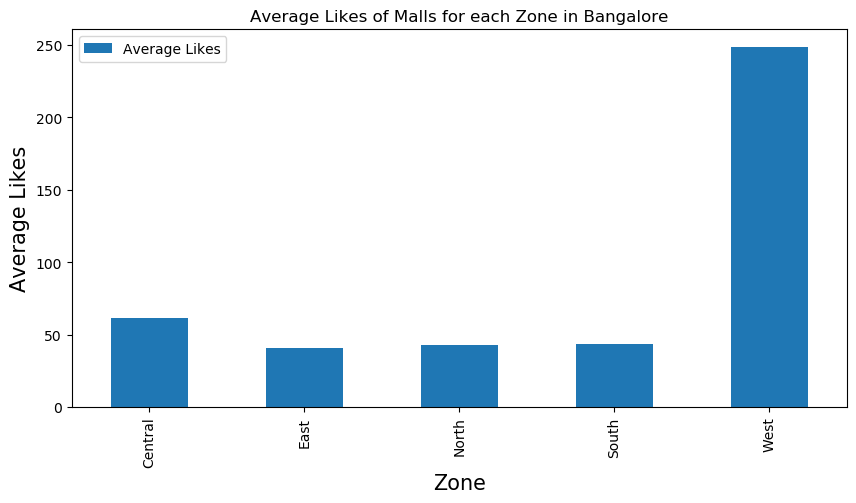

In [120]:
plt.figure(figsize=(10,5), dpi = 100)
plt.title('Average Likes of Malls for each Zone in Bangalore')
plt.xlabel('Zone', fontsize = 15)
plt.ylabel('Average Likes', fontsize=15)
z_l.groupby('Zone')['Average Likes'].mean().plot(kind='bar')
plt.legend()
plt.show()

We can see that the malls in West zone have higher average number of likes compared to malls in any other zones.

Create two dataframes, one with the neighborhoods and their average rating, and the other with zones and their average rating.

In [121]:
n_r = d_f.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
n_r.columns = ['Neighborhood', 'Average Rating']

In [122]:
z_r = d_f.groupby('Zone',as_index=False).mean()[['Zone','Rating']]
z_r.columns = ['Zone', 'Average Rating']

Sort these dataframes.

In [123]:
n_r_sort = n_r.sort_values(by='Average Rating', ascending=False)
z_r_sort = z_r.sort_values(by='Average Rating', ascending=False)

In [124]:
n_r_sort.head()

,Neighborhood,Average Rating
78,Sampangiram Nagar,8.6
75,Rajaji Nagar,8.6
55,Lingarajapuram,7.9
43,Jeevanahalli,7.9
23,Cox Town,7.9


In [125]:
z_r_sort.head()

,Zone,Average Rating
4,West,7.733333
0,Central,6.119444
2,North,6.092308
3,South,5.852500
1,East,5.280769


Visualise the average ratings for malls in each zone.

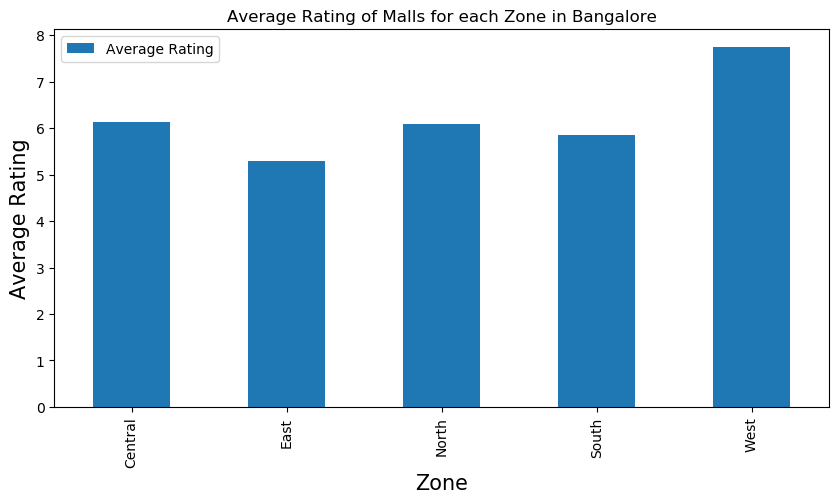

In [126]:
plt.figure(figsize=(10,5), dpi = 100)
plt.title('Average Rating of Malls for each Zone in Bangalore')
plt.xlabel('Zone', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
z_r.groupby('Zone')['Average Rating'].mean().plot(kind='bar')
plt.legend()
plt.show()

We can see that the malls in West zone have higher average rating compared to malls in any other zones.

Create two dataframes, one with the neighborhoods and their average tips, and the other with zones and their average tips.

In [128]:
n_t = d_f.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Tips']]
n_t.columns = ['Neighborhood', 'Average Tips']
z_t = d_f.groupby('Zone',as_index=False).mean()[['Zone','Tips']]
z_t.columns = ['Zone', 'Average Tips']

Sort these dataframes.

In [129]:
n_t_sort = n_t.sort_values(by='Average Tips', ascending=False)
z_t_sort = z_t.sort_values(by='Average Tips', ascending=False)

In [130]:
n_t_sort.head()

,Neighborhood,Average Tips
79,Seshadripuram,140.0
78,Sampangiram Nagar,104.0
75,Rajaji Nagar,103.0
41,J. P. Nagar,68.0
39,Hulimavu,63.0


In [131]:
z_t_sort

,Zone,Average Tips
4,West,36.333333
0,Central,19.583333
1,East,17.692308
3,South,16.225000
2,North,15.000000


Visualise the average number of tips for malls in each zone.

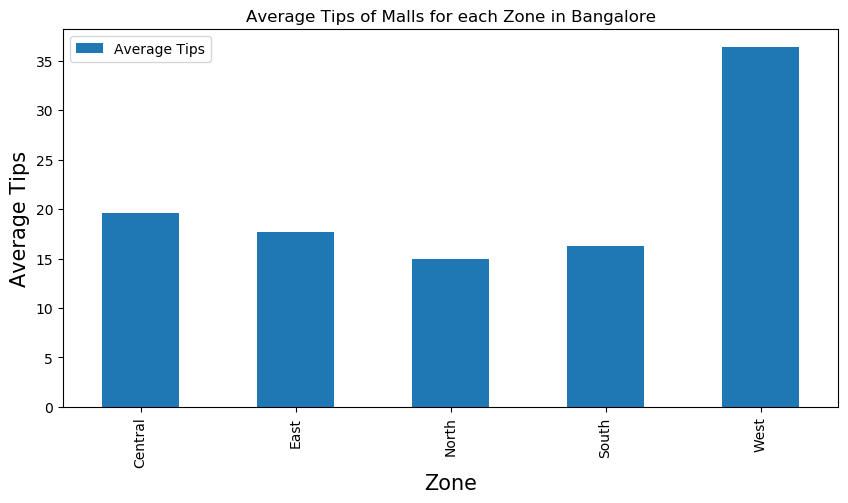

In [132]:
plt.figure(figsize=(10,5), dpi = 100)
plt.title('Average Tips of Malls for each Zone in Bangalore')
plt.xlabel('Zone', fontsize = 15)
plt.ylabel('Average Tips', fontsize=15)
z_t.groupby('Zone')['Average Tips'].mean().plot(kind='bar')
plt.legend()
plt.show()

We can see that the malls in West zone have higher average number of tips compared to malls in any other zones.

Consider the top 10 neighborhoods in each category(likes, rating and tips).

In [133]:
l_top = n_l_sort.head(10)
r_top = n_r_sort.head(10)
t_top = n_t_sort.head(10)

In [134]:
l_top

,Neighborhood,Average Likes
75,Rajaji Nagar,725.0
78,Sampangiram Nagar,657.0
79,Seshadripuram,445.0
41,J. P. Nagar,247.0
39,Hulimavu,183.0
11,Bellandur,150.0
54,Lakshman Mudaliar Street,100.0
81,Shivajinagar,100.0
88,Victoria Layout,85.8
4,Austin Town,85.8


In [145]:
lt = l_top.merge(df, on='Neighborhood')
lt = lt[['Zone', 'Neighborhood', 'Latitude', 'Longitude', 'Average Likes']]
lt

,Zone,Neighborhood,Latitude,Longitude,Average Likes
0,West,Rajaji Nagar,13.005440,77.556930,725.0
1,Central,Sampangiram Nagar,12.977180,77.589750,657.0
2,North,Seshadripuram,12.993550,77.579880,445.0
3,South,J. P. Nagar,12.908310,77.590240,247.0
4,South,Hulimavu,12.880640,77.601470,183.0
5,East,Bellandur,12.927350,77.671850,150.0
6,South,Lakshman Mudaliar Street,12.983334,77.609441,100.0
7,Central,Shivajinagar,12.987200,77.604010,100.0
8,Central,Victoria Layout,12.965580,77.615660,85.8
9,Central,Austin Town,12.963480,77.612970,85.8


A map of Bangalore, with the top 10 areas based on average number of likes, superimposed on top is made using folium library.

In [146]:
bmap = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood, likes in zip(lt['Latitude'], lt['Longitude'], lt['Neighborhood'], lt['Average Likes']):
    label = '{}, Likes: {}'.format(neighborhood, likes)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(bmap)  
    
bmap

In [148]:
rt = r_top.merge(df, on='Neighborhood')
rt = rt[['Zone', 'Neighborhood', 'Latitude', 'Longitude', 'Average Rating']]
rt

,Zone,Neighborhood,Latitude,Longitude,Average Rating
0,Central,Sampangiram Nagar,12.97718,77.58975,8.6
1,West,Rajaji Nagar,13.00544,77.55693,8.6
2,North,Lingarajapuram,13.00548,77.62597,7.9
3,North,Jeevanahalli,12.99782,77.62996,7.9
4,Central,Cox Town,12.99594,77.62644,7.9
5,North,Pulikeshi Nagar,12.99965,77.61528,7.8
6,Central,Cooke Town,13.00363,77.62283,7.8
7,North,St. Thomas town,13.00488,77.62324,7.8
8,South,Kumaraswamy Layout,12.89819,77.55927,7.7
9,South,Yelachenahalli,12.90044,77.56865,7.7


A map of Bangalore, with the top 10 areas based on average ratings, superimposed on top is made using folium library.

In [149]:
bmap = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood, rating in zip(rt['Latitude'], rt['Longitude'], rt['Neighborhood'], rt['Average Rating']):
    label = '{}, Rating: {}'.format(neighborhood, rating)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(bmap)  
    
bmap

In [150]:
tt = t_top.merge(df, on='Neighborhood')
tt = tt[['Zone', 'Neighborhood', 'Latitude', 'Longitude', 'Average Tips']]
tt

,Zone,Neighborhood,Latitude,Longitude,Average Tips
0,North,Seshadripuram,12.993550,77.579880,140.00
1,Central,Sampangiram Nagar,12.977180,77.589750,104.00
2,West,Rajaji Nagar,13.005440,77.556930,103.00
3,South,J. P. Nagar,12.908310,77.590240,68.00
4,South,Hulimavu,12.880640,77.601470,63.00
5,East,Bellandur,12.927350,77.671850,47.00
6,Central,Shivajinagar,12.987200,77.604010,29.00
7,South,Lakshman Mudaliar Street,12.983334,77.609441,29.00
8,Central,Commercial Street,12.982232,77.608278,27.25
9,Central,Austin Town,12.963480,77.612970,27.20


A map of Bangalore, with the top 10 areas based on average number of tips, superimposed on top is made using folium library.

In [151]:
bmap = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood, tips in zip(tt['Latitude'], tt['Longitude'], tt['Neighborhood'], tt['Average Tips']):
    label = '{}, Tips: {}'.format(neighborhood, tips)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(bmap)  
    
bmap

## Results <a name="results"></a>

The results obtained were quite astonishing. Even though there were more number of malls in Central zone and least number of malls in West zone, the average number of likes were highest in West zone, followed by Central zone. This trend also appears in the average rating and average number of tips.

The outliers present in data could be affecting the average number of likes. Since West zone has less number of malls the presence of outliers could very much affect the result. From the above results we can see that Rajaji Nagar from West zone has 725 average likes which way higher when compared to other neighborhoods. So, this neighborhood adds much weight to the average number of likes for the malls in West zone. 

## Conclusion <a name="conclusion"></a>

The main purpose of this project was to identify the neighborhoods with most number of malls, the neighborhoods with highest rated malls and the neighborhood with most liked malls. This helps people in identifying a neighborhood that they can go to hangout. For example, if somebody wants multiple options in shopping, he/she can go to Central zone as it has the highest number of malls.

It also helps investors to find potential places in which they can build a mall. For instance, the number of neighborhoods in North zone are very high which implies a huge population, but the number of malls are comparitively low. 